Датасет для анализа: https://www.kaggle.com/mauryashubham/english-premier-league-players-dataset

## Content

name: Name of the player

club: Club of the player

age : Age of the player

position : The usual position on the pitch

position_cat :1 for attackers, 2 for midfielders, 3 for defenders, 4 for goalkeepers

market_value : As on transfermrkt.com on July 20th, 2017

page_views : Average daily Wikipedia page views from September 1, 2016 to May 1, 2017

fpl_value : Value in Fantasy Premier League as on July 20th, 2017

fpl_sel : % of FPL players who have selected that player in their team

fpl_points : FPL points accumulated over the previous season

region:1 for England, 2 for EU, 3 for Americas, 4 for Rest of World

nationality

new_foreign : Whether a new signing from a different league, for 2017/18 (till 20th July)

age_cat

club_id

big_club: Whether one of the Top 6 clubs

new_signing: Whether a new signing for 2017/18 (till 20th July) 

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('archive.zip')

In [3]:
df

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.40%,38,2.0,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4.0,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.30%,29,1.0,England,0,2,20,0,0
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,5.90%,16,1.0,England,0,1,20,0,1


In [4]:
df.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,1.993478,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,0.957689,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


Проверим датасет на отсутствующие значения, при возможности однозначной замены произведём её

In [5]:
df.isnull().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          1
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

In [6]:
df[df.region.isnull()]

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
188,Steve Mounie,Huddersfield,22,CF,1,5.5,56,6.0,0.60%,0,NaN,Benin,0,2,8,0,0


In [7]:
df.region.fillna(4, inplace=True)
df.isnull().sum().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        461 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


Значения fpl_sel имеют тип 'object', преобразуем данные в тип 'float', с которым удобнее работать

In [9]:
df['fpl_sel'] = df['fpl_sel'].apply(lambda x: float(str(x)[:-1]) / 100)

Показатели region и position_cat являются категориальным, преобразуем тип данных

In [10]:
df.region = df.region.astype('int').astype('category')
df.position_cat = df.position_cat.astype('category')

Проверим гипотезу о том, что игроки, занимающие позиции вратаря и центрального защитника, в среднем старше остальных игроков на поле

In [11]:
df.groupby('position', as_index=False).age.mean().sort_values('age', ascending=False)

,position,age
5,GK,29.571429
7,LM,29.000000
9,RB,27.617647
1,CB,27.094118
4,DM,26.805556
3,CM,26.730159
0,AM,26.294118
6,LB,26.257143
2,CF,26.098361
12,SS,25.714286


In [12]:
df.groupby('position', as_index=False).age.median().sort_values('age', ascending=False)

,position,age
5,GK,30.0
7,LM,29.5
1,CB,27.0
3,CM,27.0
6,LB,27.0
9,RB,27.0
4,DM,26.5
0,AM,26.0
2,CF,26.0
8,LW,26.0


Самой возрастной позицией, как и предполагалось, является вратарская, но за ней следует левый полузащитник, проверим распределение количества игроков в датасете по позициям

In [13]:
df.position.value_counts()

CB    85
CM    63
CF    61
GK    42
LW    36
DM    36
LB    35
RB    34
RW    32
AM    17
LM     8
SS     7
RM     5
Name: position, dtype: int64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

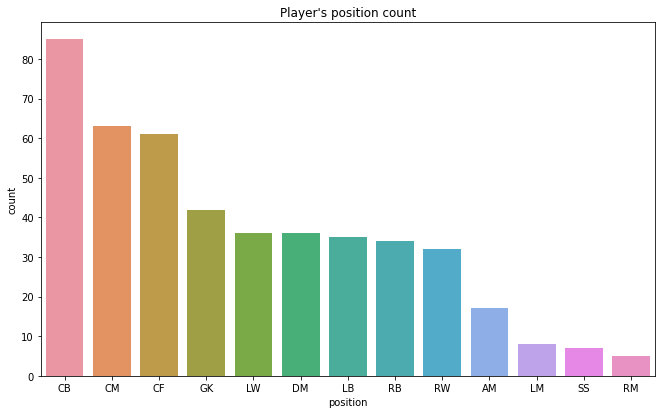

In [15]:
plt.figure(figsize=(11, 6.5))
sns.countplot(df.position, order=df.position.value_counts().index)
plt.title('Player\'s position count')
plt.show()

Распределение игроков в датасете показывает, что футболистов на позициях LM, SS и RM (и в меньшей степени AM) крайне мало, посмотрим распределение игроков по возрастам и по позициям с наименьшими значениями

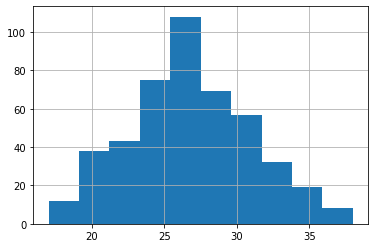

In [16]:
df.age.hist()

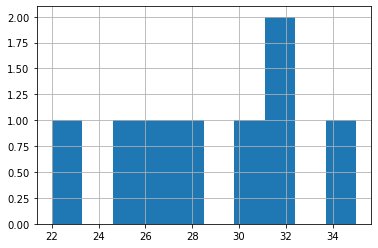

In [17]:
df.age[df.position == 'LM'].hist()

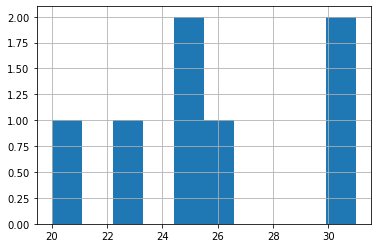

In [18]:
df.age[df.position == 'SS'].hist()

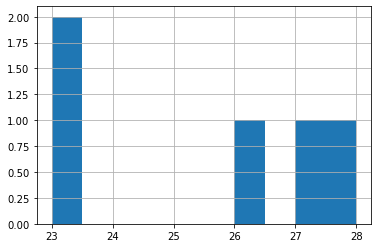

In [19]:
df.age[df.position == 'RM'].hist()

Гистограмма распределения возрастов по датасету свидетельствует о нормальном, в целом, распределении, но распределение по наименьшим по представительству позициям далеко от нормального из-за малого количества данных, что критично влияет на подсчет среднего, объединим игроков на этих позициях с наиболее близкими к ним: LM-LW, RM-RW, SS-CF, AM-CM

In [20]:
df_new = df.copy()

In [21]:
df_new.position[df.position == 'LM'] = 'LW'
df_new.position[df.position == 'RM'] = 'RW'
df_new.position[df.position == 'AM'] = 'CM'
df_new.position[df.position == 'SS'] = 'CF'

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package s

In [22]:
df_new.position.value_counts()

CB    85
CM    80
CF    68
LW    44
GK    42
RW    37
DM    36
LB    35
RB    34
Name: position, dtype: int64

In [23]:
df_new.groupby('position', as_index=False).age.mean().sort_values('age', ascending=False)

,position,age
4,GK,29.571429
7,RB,27.617647
0,CB,27.094118
3,DM,26.805556
2,CM,26.637500
5,LB,26.257143
1,CF,26.058824
6,LW,25.954545
8,RW,25.513514


In [24]:
df_new.groupby('position', as_index=False).age.median().sort_values('age', ascending=False)

,position,age
4,GK,30.0
0,CB,27.0
2,CM,27.0
5,LB,27.0
6,LW,27.0
7,RB,27.0
3,DM,26.5
1,CF,26.0
8,RW,26.0


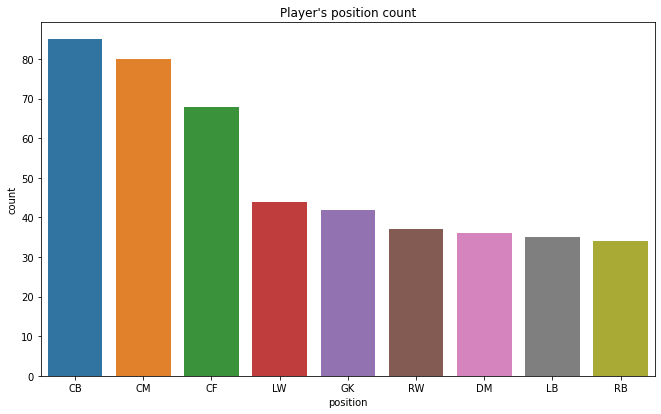

In [25]:
plt.figure(figsize=(11, 6.5))
sns.countplot(df_new.position, order=df_new.position.value_counts().index)
plt.title('Player\'s position count')
plt.show()

Мы видим, что вратари действительно старше своих коллег (медианный возраст больше на 3-4 года, средний - на 2-4 года в зависимости от позиции для сравнения), по центральным защитникам такой вывод сделать нельзя, т.к. средний возраст правых защитников на полгода больше, а опорных полузащитников немногим меньше, медианный же возраст совпадает с еще 4 позициями на поле

Сравним рыночную стоимость игроков команд из топ-6 и остальных, рассмотрим 25 и 75 квантили для того, чтобы минимизировать выбросы данных

In [26]:
df_new.groupby('big_club').market_value\
    .agg([lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])\
    .set_axis(['quantile_25%', 'quantile_75%'], axis=1)

,quantile_25%,quantile_75%
big_club,,
0,2.0,8.0
1,10.0,30.0


Визуализируем разницу в цене

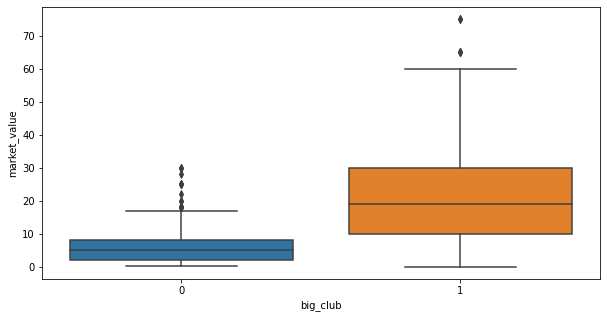

In [27]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='big_club',y='market_value', data=df_new)
plt.show()

Графики не имеют пересечений за исключением выбросов, что отражает сильную разницу в цене футболистов топ-6 и остальных команд, средняя цена футболиста вне топ-6 находится в диапазоне 2-8 млн.долл., в топ-6 диапазон составляет 10-30 млн.долл.

Построим таблицу корреляции признаков

In [28]:
df_new.corr()

,age,market_value,page_views,fpl_value,fpl_sel,fpl_points,new_foreign,age_cat,club_id,big_club,new_signing
age,1.000000,-0.132396,-0.048682,-0.097659,-0.003018,0.187785,-0.125400,0.972199,-0.002868,-0.123566,-0.079190
market_value,-0.132396,1.000000,0.739657,0.788653,0.548703,0.615155,0.098056,-0.117682,-0.046068,0.593483,0.131321
page_views,-0.048682,0.739657,1.000000,0.730640,0.524926,0.542464,-0.049725,-0.041672,-0.092409,0.502982,0.127249
fpl_value,-0.097659,0.788653,0.730640,1.000000,0.504888,0.618837,0.108650,-0.082056,-0.060884,0.423556,0.098314
fpl_sel,-0.003018,0.548703,0.524926,0.504888,1.000000,0.517008,0.079416,-0.010506,-0.033063,0.269498,-0.026993
fpl_points,0.187785,0.615155,0.542464,0.618837,0.517008,1.000000,-0.204837,0.176572,0.041094,0.280061,0.085720
new_foreign,-0.125400,0.098056,-0.049725,0.108650,0.079416,-0.204837,1.000000,-0.113998,-0.002786,0.080949,-0.078193
age_cat,0.972199,-0.117682,-0.041672,-0.082056,-0.010506,0.176572,-0.113998,1.000000,-0.004668,-0.113835,-0.076102
club_id,-0.002868,-0.046068,-0.092409,-0.060884,-0.033063,0.041094,-0.002786,-0.004668,1.000000,-0.155667,0.134085
big_club,-0.123566,0.593483,0.502982,0.423556,0.269498,0.280061,0.080949,-0.113835,-0.155667,1.000000,0.035508


Построим модель, предсказывающую рыночную стоимость футболиста, для этого удалим лишние и дублирующие признаки

In [29]:
X = df_new[['age', 'position_cat', 'page_views', 'fpl_value', 'fpl_sel', 'fpl_points', 'region', 'big_club']]
y = df_new['market_value']

Т.к. показатели  'region' и 'position_cat' категориальные, переведём их в бинарный вид для использования в модели регрессии

In [30]:
X = pd.get_dummies(X, prefix='region', columns=['region'])
X = pd.get_dummies(X, prefix='position', columns=['position_cat'])

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape

((368, 14), (93, 14))

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr = LinearRegression()

In [34]:
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = lr.predict(X_test)

Список признаков регрессионной модели в порядке убывания значимости

In [36]:
pd.DataFrame(data={'feature': list(X.columns), 'coef': abs(lr.coef_)}).sort_values('coef', ascending=False)

,feature,coef
3,fpl_sel,22.060491
5,big_club,5.637493
2,fpl_value,4.581778
10,position_1,3.077440
6,region_1,1.416693
11,position_2,1.233659
12,position_3,0.987801
13,position_4,0.855981
9,region_4,0.783923
7,region_2,0.552491


In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [38]:
print('mean_squared_error', mean_squared_error(y_test, y_pred).round(2))
print('mean_absolute_error', mean_absolute_error(y_test, y_pred).round(2))
print('r2_score', r2_score(y_test, y_pred).round(2))

mean_squared_error 26.92
mean_absolute_error 3.7
r2_score 0.78


Коэффициент детерминации модели равен 0.78, соответственно признаки модели на 78 % объясняют зависмость целевой переменной, средняя абсолютная ошибка прогноза по игроку составляет 3.7 млн.долл., среднеквадратичная ошибка - 26.92, также можно заметить, что самым значимым критерием модели является fpl_sel, что объясняется желанием болельщиков взятьть в fantasy-команду наиболее сильных и, соответственно, дорогих игроков

Построим модель классификации на игроков защиты и атаки (объединим вратарей и защитников в один класс (0), полузащитников и нападающих в другой (1))

In [39]:
df_new['class_pos'] = 0
df_new['class_pos'][(df_new.position_cat == 3) | (df_new.position_cat == 4)] = 1

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
df_new.class_pos = df_new.class_pos.astype('category')

In [41]:
df_new
X = df_new[['age', 'market_value', 'page_views', 'fpl_value', 'fpl_sel', 'fpl_points', 'region', 'big_club']]
y = df_new['class_pos']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [44]:
clf_rf = RandomForestClassifier()
parametrs = {'n_estimators': range(5, 30), 'max_depth': range(1, 30)}
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)

In [45]:
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'max_depth': 22, 'n_estimators': 26}

In [46]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf.score(X_test, y_test)

0.8064516129032258

In [47]:
y_pred = best_clf.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [49]:
print('accuracy_score', accuracy_score(y_test, y_pred).round(2))
print('precision_score', precision_score(y_test, y_pred).round(2))
print('recall_score', recall_score(y_test, y_pred).round(2))
print('f1_score', f1_score(y_test, y_pred).round(2))

accuracy_score 0.81
precision_score 0.86
recall_score 0.64
f1_score 0.74


In [50]:
feature_importances = best_clf.feature_importances_
feature_importances

array([0.10496039, 0.13960647, 0.18153022, 0.16494614, 0.17004015,
       0.13926673, 0.05431403, 0.04533587])

In [51]:
feature_importances_df = pd.DataFrame({'features': list(X_train),
                                       'feature_importances': feature_importances})
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
2,page_views,0.181530
4,fpl_sel,0.170040
3,fpl_value,0.164946
1,market_value,0.139606
5,fpl_points,0.139267
0,age,0.104960
6,region,0.054314
7,big_club,0.045336


Среднегармоническая оценка точности предсказания модели (f1_score) = 0.74, точность ответов составляет 86%, модель по имеющимся признакам различает классы игроков, что можно объяснить большей популярностью футболистов группы атаки (признаки, отражающие популярность (fpl_sel, page_views) имеют наибольшее влияние при предсказании класса). Наименьшее влияние имеют признаки big_club и region, что логично, т.к. позиция игрока на поле не зависит от силы клуба и национальности футболиста и распределение по этим критериям должно быть равномерным